# **Loan Default Risk Prediction**

In [81]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,log_loss,confusion_matrix,ConfusionMatrixDisplay
from scipy.stats import randint,uniform
import pickle

warnings.filterwarnings('ignore')

# EDA

In [2]:
raw_data = pd.read_csv('Applicant-details.csv')
df = raw_data.copy()
df.head().T

,0,1,2,3,4
Applicant_ID,75722,80185,19865,76700,92992
Annual_Income,9657655,9259353,1509721,5867312,7223191
Applicant_Age,76,37,66,43,44
Work_Experience,0,18,8,1,9
Marital_Status,single,single,single,single,single
House_Ownership,rented,rented,rented,owned,rented
Vehicle_Ownership(car),no,no,no,no,no
Occupation,Psychologist,Petroleum_Engineer,Drafter,Chartered_Accountant,Air_traffic_controller
Residence_City,Jalandhar,Bally,Indore,Kurnool[18],Asansol
Residence_State,Punjab,West_Bengal,Madhya_Pradesh,Andhra_Pradesh,West_Bengal


In [3]:
df.shape

(100000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Applicant_ID                 100000 non-null  int64 
 1   Annual_Income                100000 non-null  int64 
 2   Applicant_Age                100000 non-null  int64 
 3   Work_Experience              100000 non-null  int64 
 4   Marital_Status               100000 non-null  object
 5   House_Ownership              100000 non-null  object
 6   Vehicle_Ownership(car)       100000 non-null  object
 7   Occupation                   100000 non-null  object
 8   Residence_City               100000 non-null  object
 9   Residence_State              100000 non-null  object
 10  Years_in_Current_Employment  100000 non-null  int64 
 11  Years_in_Current_Residence   100000 non-null  int64 
 12  Loan_Default_Risk            100000 non-null  int64 
dtypes: int64(7), ob

## Applicant_ID

In [5]:
df['Applicant_ID'].value_counts()

Applicant_ID
75722    1
66848    1
34822    1
46001    1
32852    1
        ..
37943    1
61499    1
1014     1
4390     1
15796    1
Name: count, Length: 100000, dtype: int64

In [6]:
df['Applicant_ID'].nunique()

100000

Number of unique entries in 'Applicant_ID' column are equal to the number of data entries. That means all the entries are unique and will not be useful in modelling. Hence, this column will be dropped in preprocessing.

## Annual_Income

In [7]:
#df['Annual_Income'].value_counts()

Text(0, 0.5, 'Frequency')

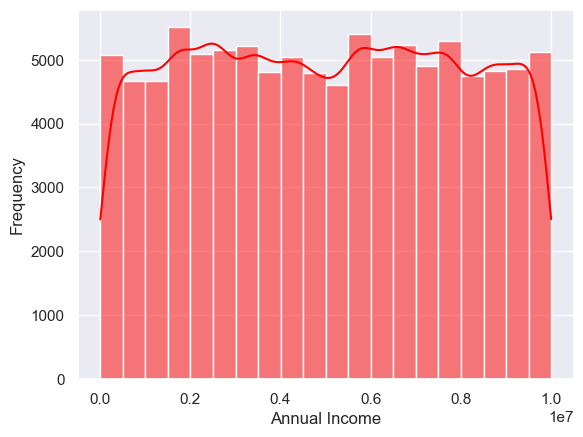

In [8]:
sns.set()
sns.histplot(df['Annual_Income'],bins=20,kde=True,color='red')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

## Applicant_Age

In [9]:
#df['Applicant_Age'].value_counts()

Text(0, 0.5, 'Frequency')

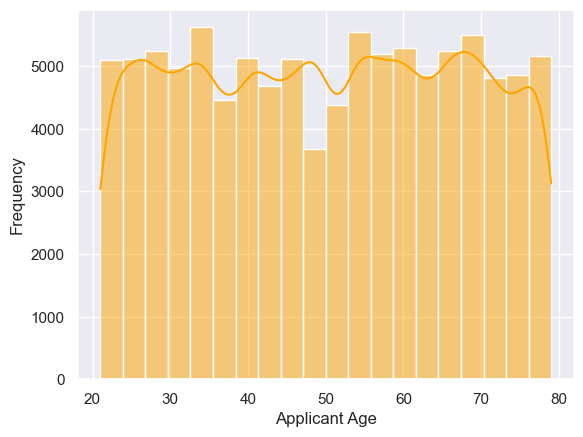

In [10]:
sns.set()
sns.histplot(df['Applicant_Age'],bins=20,kde=True,color='orange')
plt.xlabel('Applicant Age')
plt.ylabel('Frequency')

## Work_Experience

In [11]:
#df['Work_Experience'].value_counts()

Text(0, 0.5, 'Frequency')

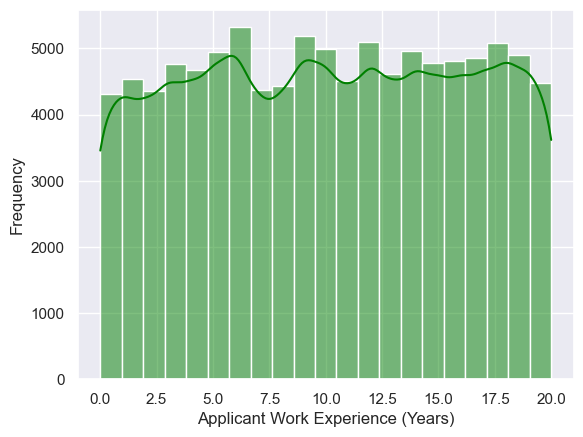

In [12]:
sns.set()
sns.histplot(df['Work_Experience'],bins=21,kde=True,color='green')
plt.xlabel('Applicant Work Experience (Years)')
plt.ylabel('Frequency')

## Marital_Status

In [13]:
df['Marital_Status'].value_counts()

Marital_Status
single     89763
married    10237
Name: count, dtype: int64

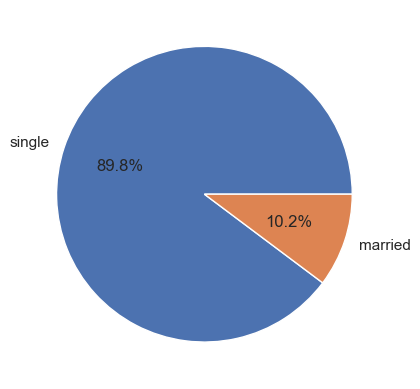

In [14]:
plt.pie(x=df['Marital_Status'].value_counts(),
        labels=df['Marital_Status'].unique(),
        autopct='%1.1f%%')
plt.show()

## House_Ownership

In [15]:
df['House_Ownership'].value_counts()

House_Ownership
rented          92088
owned            5081
norent_noown     2831
Name: count, dtype: int64

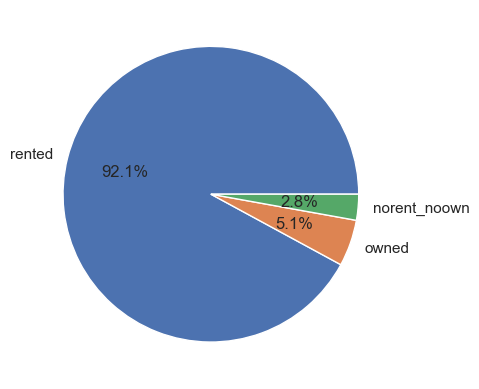

In [16]:
plt.pie(x=df['House_Ownership'].value_counts(),
        labels=df['House_Ownership'].unique(),
        autopct='%1.1f%%')
plt.show()

## Vehicle_Ownership

In [17]:
df['Vehicle_Ownership(car)'].value_counts()

Vehicle_Ownership(car)
no     69665
yes    30335
Name: count, dtype: int64

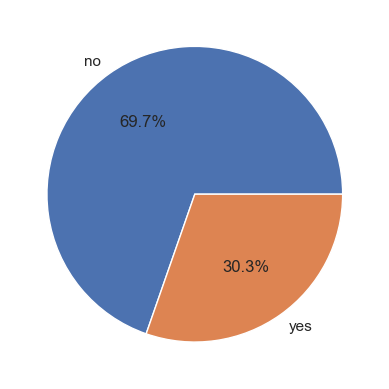

In [18]:
plt.pie(x=df['Vehicle_Ownership(car)'].value_counts(),
        labels=df['Vehicle_Ownership(car)'].unique(),
        autopct='%1.1f%%')
plt.show()

## Occupation

In [19]:
#df['Occupation'].value_counts().sort_values(ascending=False)

In [20]:
df['Occupation'].nunique()

51

Let us visualize the top-10 Most frequent and bottom-10 Least frequent Occupations.

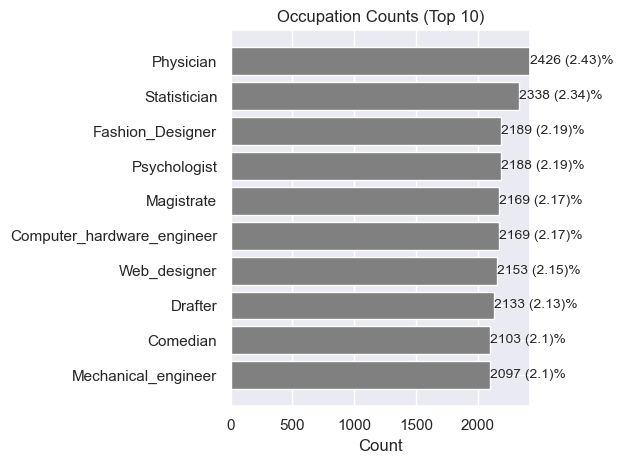

In [21]:
occu_counts_total = df['Occupation'].value_counts().sum()
occu_counts_top_10 = df['Occupation'].value_counts().sort_values(ascending=True)[-10:]
plt.barh(width = occu_counts_top_10,
         y = occu_counts_top_10.index,
         color = 'grey')
plt.xlim(0,occu_counts_top_10.max())
plt.title("Occupation Counts (Top 10)")
plt.xlabel('Count')
for i, count in enumerate(occu_counts_top_10):
    plt.text(x = count,
             y = i,
             s = str(occu_counts_top_10[i]) + " " + "(" + str(round((occu_counts_top_10[i]/occu_counts_total*100),2)) + ")%",
             fontsize = 10,
             va='center')
plt.tight_layout()
plt.show()

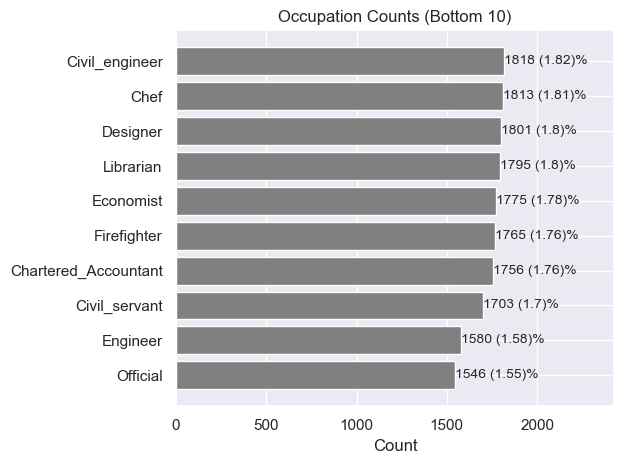

In [22]:
occu_counts_bottom_10 = df['Occupation'].value_counts().sort_values(ascending=True)[0:10]
plt.barh(width = occu_counts_bottom_10,
         y = occu_counts_bottom_10.index,
         color ='grey')
plt.xlim(0,occu_counts_top_10.max())
plt.title("Occupation Counts (Bottom 10)")
plt.xlabel('Count')
for i, count in enumerate(occu_counts_bottom_10):
    plt.text(x = count,
             y = i,
             s = str(occu_counts_bottom_10[i]) + " " + "(" + str(round((occu_counts_bottom_10[i]/occu_counts_total*100),2)) + ")%",
             fontsize = 10,
             va='center')
plt.tight_layout()
plt.show()

## Residence_City

In [23]:
df['Residence_City'].nunique()

317

In [24]:
df['Residence_City'].value_counts()

Residence_City
Vijayanagaram       519
Bhopal              509
Vijayawada          494
Bulandshahr         490
Saharsa[29]         490
                   ... 
Ujjain              169
Bettiah[33]         166
Katni               165
Warangal[11][12]    159
Karaikudi           149
Name: count, Length: 317, dtype: int64

In [25]:
def clean_string(s):
    output = ''
    for char in s:
        if char.isalpha() or char == ' ':
            output += char
    return output

In [26]:
df['Residence_City'] = df['Residence_City'].apply(lambda x: clean_string(x))
df['Residence_City'].value_counts() #All square brackets with values are cleaned

Residence_City
Aurangabad       618
Vijayanagaram    519
Bhopal           509
Vijayawada       494
Bulandshahr      490
                ... 
Ujjain           169
Bettiah          166
Katni            165
Warangal         159
Karaikudi        149
Name: count, Length: 316, dtype: int64

Let us visualize the top-10 Most resided and bottom-10 Least resided cities.

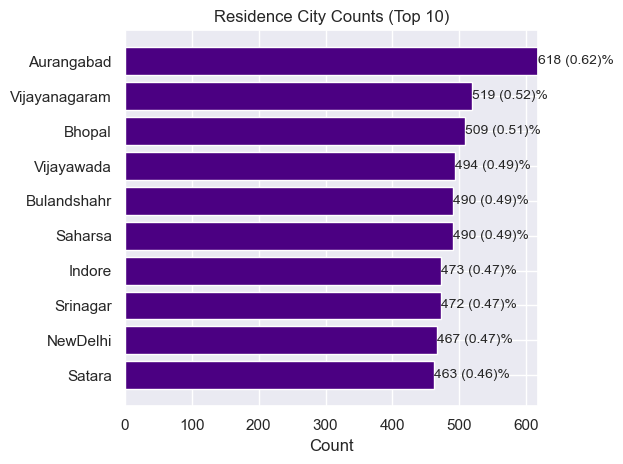

In [30]:
res_city_total = df['Residence_City'].value_counts().sum()
res_city_top_10 = df['Residence_City'].value_counts().sort_values(ascending=True)[-10:]
plt.barh(width = res_city_top_10,
         y = res_city_top_10.index,
         color = 'indigo')
plt.xlim(0,res_city_top_10.max())
plt.title("Residence City Counts (Top 10)")
plt.xlabel('Count')
for i, count in enumerate(res_city_top_10):
    plt.text(x = count,
             y = i,
             s = str(res_city_top_10[i]) + " " + "(" + str(round((res_city_top_10[i]/res_city_total*100),2)) + ")%",
             fontsize = 10,
             va='center')
plt.tight_layout()
plt.show()

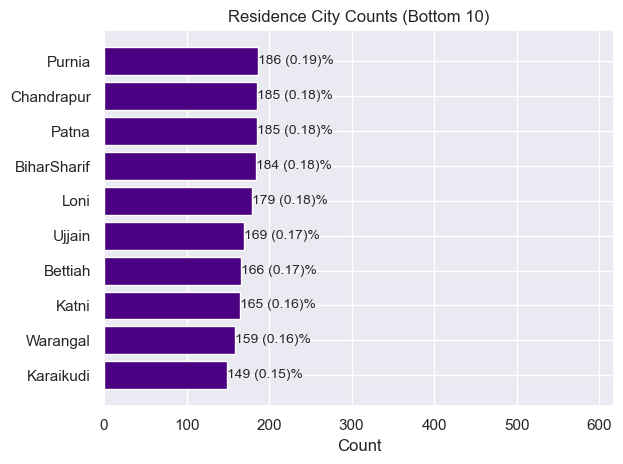

In [31]:
res_city_bottom_10 = df['Residence_City'].value_counts().sort_values(ascending=True)[0:10]
plt.barh(width=res_city_bottom_10,
         y=res_city_bottom_10.index,
         color='indigo')
plt.xlim(0,res_city_top_10.max())
plt.title("Residence City Counts (Bottom 10)")
plt.xlabel('Count')
for i, count in enumerate(res_city_bottom_10):
    plt.text(x = count,
             y = i,
             s = str(res_city_bottom_10[i]) + " " + "(" + str(round((res_city_bottom_10[i]/res_city_total*100),2)) + ")%",
             fontsize = 10,
             va='center')
plt.tight_layout()
plt.show()

## Residence_State

In [32]:
df['Residence_State'].value_counts()

Residence_State
Uttar_Pradesh        11255
Maharashtra          10158
Andhra_Pradesh       10045
West_Bengal           9327
Bihar                 7867
Tamil_Nadu            6595
Madhya_Pradesh        5587
Karnataka             4687
Gujarat               4582
Jharkhand             3601
Rajasthan             3589
Haryana               3075
Telangana             2929
Assam                 2849
Kerala                2316
Delhi                 2183
Punjab                1886
Odisha                1833
Chhattisgarh          1513
Uttarakhand            758
Jammu_and_Kashmir      721
Puducherry             566
Mizoram                340
Manipur                338
Himachal_Pradesh       337
Tripura                312
Uttar_Pradesh[5]       287
Chandigarh             255
Sikkim                 209
Name: count, dtype: int64

In [33]:
df['Residence_State'] = df['Residence_State'].apply(lambda x: clean_string(x))
df['Residence_State'].value_counts() #All square brackets with values are cleaned

Residence_State
UttarPradesh       11542
Maharashtra        10158
AndhraPradesh      10045
WestBengal          9327
Bihar               7867
TamilNadu           6595
MadhyaPradesh       5587
Karnataka           4687
Gujarat             4582
Jharkhand           3601
Rajasthan           3589
Haryana             3075
Telangana           2929
Assam               2849
Kerala              2316
Delhi               2183
Punjab              1886
Odisha              1833
Chhattisgarh        1513
Uttarakhand          758
JammuandKashmir      721
Puducherry           566
Mizoram              340
Manipur              338
HimachalPradesh      337
Tripura              312
Chandigarh           255
Sikkim               209
Name: count, dtype: int64

In [34]:
df['Residence_State'].nunique()

28

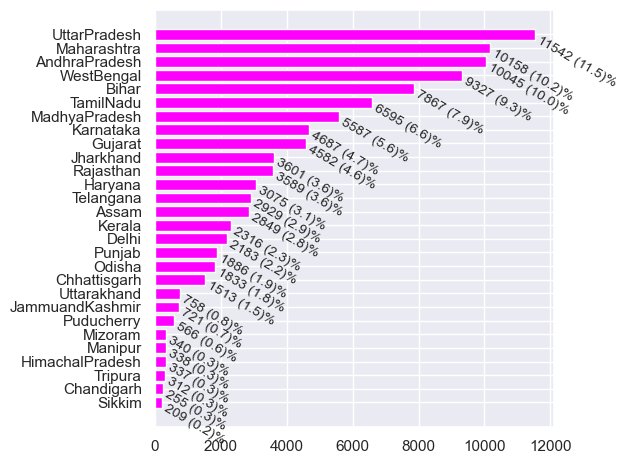

In [35]:
res_state_counts = df['Residence_State'].value_counts().sort_values(ascending=True)
plt.barh(width=res_state_counts,
         y=res_state_counts.index,
         color='magenta')
for i, count in enumerate(res_state_counts):
    plt.text(x = count,
             y = i,
             s = str(res_state_counts[i]) + " " + "(" + str(round((res_state_counts[i]/res_state_counts.sum()*100),1)) + ")%",
             va='top',
             fontsize=10,
             rotation=-30)
plt.tight_layout()
plt.show()

## Years_in_Current_Employment

In [36]:
#df['Years_in_Current_Employment'].value_counts()

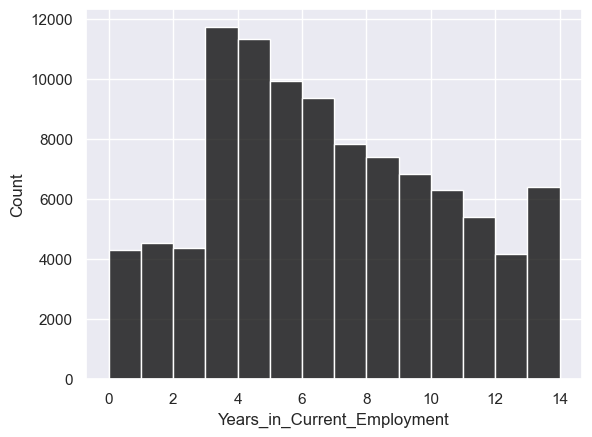

In [37]:
sns.histplot(df['Years_in_Current_Employment'],
             bins=14,
             color='black')
plt.show()

## Years_in_Current_Residence

In [38]:
#df['Years_in_Current_Residence'].value_counts()

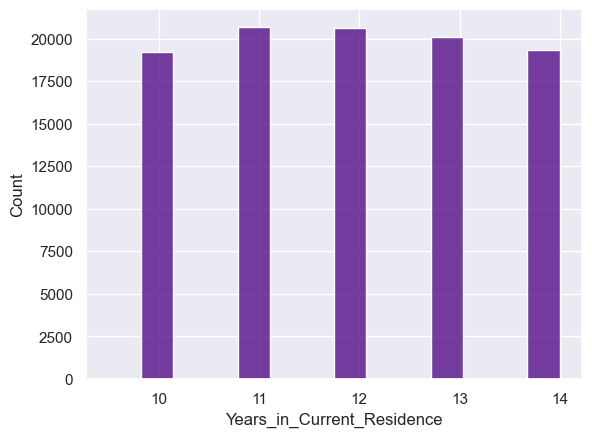

In [39]:
sns.histplot(data = df['Years_in_Current_Residence'],
             bins=14, 
             binrange=(9.5,14),
             color='indigo')
plt.show()

## TARGET : Loan_Default_Risk

In [40]:
df['Loan_Default_Risk'].value_counts()

Loan_Default_Risk
0    87003
1    12997
Name: count, dtype: int64

Here, 0 means 'Low Risk' and 1 means 'High Risk'

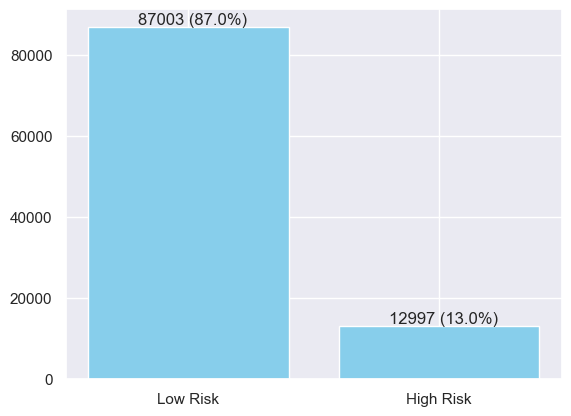

In [41]:
target_counts = df['Loan_Default_Risk'].value_counts()
plt.bar(x=['Low Risk','High Risk'], height = target_counts, color='skyblue')
for i,count in enumerate(target_counts):
    plt.text(x = i-0.2,
             y = count,
             s = str(count)+" "+"("+str(round(count/target_counts.sum()*100,2))+"%)",
             va = 'bottom')

# Preprocessing Pipeline

In [42]:
def preprocess(X):

    df = X.copy()
    
    # Applicant_ID
    df.drop('Applicant_ID',axis=1,inplace=True)

    # Residence_City and Residence_State
    def clean_string(s):
        output = ''
        for char in s:
            if char.isalpha() or char == ' ':
                output += char
        return output

    df['Residence_City'] = df['Residence_City'].apply(lambda x: clean_string(x))
    df['Residence_State'] = df['Residence_State'].apply(lambda x: clean_string(x))

    return df

In [43]:
df = preprocess(raw_data)

categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(exclude='object').columns.drop(['Loan_Default_Risk'])

categorical_transformer = Pipeline(steps=[
    ('onehot',OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

numerical_transformer = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('pca',PCA())
])

column_transformer = ColumnTransformer(transformers=[
    ('categorical',categorical_transformer,categorical_columns),
    ('numerical',numerical_transformer,numerical_columns)
])

pipe = Pipeline(steps=[
    ('column_transformer',column_transformer),
])

pipe

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Marital_Status', 'House_Ownership', 'Vehicle_Ownership(car)',
       'Occupation', 'Residence_City', 'Residence_State'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA())]),
                                                  Index(['Annual_Income', 'Applicant_Age', 'Work_Experience',
       'Years_in_Current_Employment', 'Years_in_Current_Residence'],
      dtype='object'))]))])

In [44]:
X,y = df.drop('Loan_Default_Risk',axis=1),df['Loan_Default_Risk']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y,random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25,shuffle=True,stratify=y_train,random_state=42)

X_train = pipe.fit_transform(X_train)

X_val = pipe.transform(X_val)

In [45]:
X_train.shape

(60000, 407)

# Define functions for metrics display

In [46]:
def show_val_scores(model):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    y_train_pred_prob = model.predict_proba(X_train)[:,1]
    y_val_pred_prob = model.predict_proba(X_val)[:,1]

    scores = {
        "Training Accuracy": accuracy_score(y_train,y_train_pred),
        "Validation Accuracy": accuracy_score(y_val,y_val_pred),
        "Training Precision": precision_score(y_train,y_train_pred),
        "Validation Precision": precision_score(y_val,y_val_pred),
        "Training Recall": recall_score(y_train,y_train_pred),
        "Validation Recall": recall_score(y_val,y_val_pred),
        "Training F1 Score": f1_score(y_train,y_train_pred),
        "Validation F1 Score": f1_score(y_val,y_val_pred),
        "Training ROC-AUC": roc_auc_score(y_train,y_train_pred_prob),
        "Validation ROC-AUC": roc_auc_score(y_val,y_val_pred_prob),
        "Training Log-Loss": log_loss(y_train,y_train_pred),
        "Validation Log-Loss":log_loss(y_val,y_val_pred)
    }
    return scores

In [47]:
def show_test_scores(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    y_train_pred_prob = model.predict_proba(X_train)[:,1]
    y_test_pred_prob = model.predict_proba(X_test)[:,1]
    scores = {
        "Training Accuracy": accuracy_score(y_train,y_train_pred),
        "Testing Accuracy": accuracy_score(y_test,y_test_pred),
        "Training Precision": precision_score(y_train,y_train_pred),
        "Testing Precision": precision_score(y_test,y_test_pred),
        "Training Recall": recall_score(y_train,y_train_pred),
        "Testing Recall": recall_score(y_test,y_test_pred),
        "Training F1 Score": f1_score(y_train,y_train_pred),
        "Testing F1 Score": f1_score(y_test,y_test_pred),
        "Training ROC-AUC": roc_auc_score(y_train,y_train_pred_prob),
        "Testing ROC-AUC": roc_auc_score(y_test,y_test_pred_prob),
        "Training Log-Loss": log_loss(y_train,y_train_pred),
        "Testing Log-Loss":log_loss(y_test,y_test_pred)
    }
    return scores

In [48]:
def show_confusion_matrix(model):
    y_val_pred = model.predict(X_val)
    cm = confusion_matrix(y_val,y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
    disp.plot()
    plt.grid(False)
    plt.show()

In [49]:
def cv_results(model):
    print("Best parameters:\n")
    print(model.best_params_)
    print("\n")
    
    results = model.cv_results_
    
    cv_results = pd.DataFrame({
        'params': results['params'],
        'mean_test_accuracy': results['mean_test_accuracy'],
        'mean_test_precision': results['mean_test_precision'],
        'mean_test_recall': results['mean_test_recall'],
        'mean_test_f1_macro': results['mean_test_f1_macro'],
        'mean_test_roc_auc': results['mean_test_roc_auc'],
        'mean_test_neg_log_loss': -1*results['mean_test_neg_log_loss'],
        'rank_test_neg_log_loss': results['rank_test_neg_log_loss'],  # Rank based on refit metric
    })

    for i in range(len(cv_results)):
        print(f"Rank {i+1} : {list(cv_results[cv_results['rank_test_neg_log_loss'] == i+1]['params'])[0]}")
    
    print("Randomized Search Results with Multiple Metrics:")
    return cv_results

Now, let us start with models.

# Logistic Regression

In [57]:
%%time
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

CPU times: total: 7.19 s
Wall time: 2.31 s


LogisticRegression(random_state=42)

In [58]:
scores = -1*cross_val_score(log_reg, X_train, y_train, cv=5, scoring='neg_log_loss')
print("Cross-Validation Scores:", scores)
print("Mean Score (neg_log_loss):", scores.mean())
print("Standard Deviation of Scores:", scores.std())

Cross-Validation Scores: [0.36485148 0.36347505 0.36486921 0.36895388 0.36703698]
Mean Score (neg_log_loss): 0.3658373194003624
Standard Deviation of Scores: 0.0019308868321189167


In [59]:
show_val_scores(log_reg)

{'Training Accuracy': 0.8700666666666667,
 'Validation Accuracy': 0.8699,
 'Training Precision': 0.5652173913043478,
 'Validation Precision': 0.2,
 'Training Recall': 0.0016668803692781126,
 'Validation Recall': 0.00038476337052712584,
 'Training F1 Score': 0.0033239580669905395,
 'Validation F1 Score': 0.0007680491551459294,
 'Training ROC-AUC': 0.6927193669137693,
 'Validation ROC-AUC': 0.6649797494533966,
 'Training Log-Loss': 4.683272030359288,
 'Validation Log-Loss': 4.689279305924141}

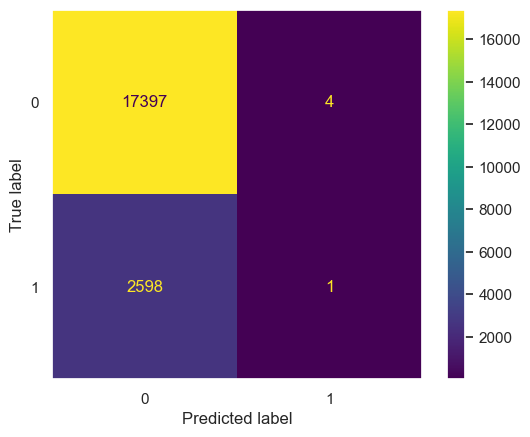

In [60]:
show_confusion_matrix(log_reg)

**Observation** : The Logistic Regressor performs very poorly on the dataset.

In [76]:
with open('log_reg.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

# Decision Tree

In [62]:
%%time
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

CPU times: total: 12.8 s
Wall time: 13 s


DecisionTreeClassifier(random_state=42)

In [63]:
scores = -1*cross_val_score(dt, X_train, y_train, cv=5, scoring='neg_log_loss')
print("Cross-Validation Scores:", scores)
print("Mean Score (neg_log_loss):", scores.mean())
print("Standard Deviation of Scores:", scores.std())

Cross-Validation Scores: [0.32527728 0.29598779 0.3345272  0.34536034 0.33227535]
Mean Score (neg_log_loss): 0.3266855918665731
Standard Deviation of Scores: 0.016648249218772566


In [64]:
show_val_scores(dt)

{'Training Accuracy': 0.9431666666666667,
 'Validation Accuracy': 0.9288,
 'Training Precision': 0.745497259201253,
 'Validation Precision': 0.6994906621392191,
 'Training Recall': 0.854468521605334,
 'Validation Recall': 0.7926125432858792,
 'Training F1 Score': 0.7962719560281993,
 'Validation F1 Score': 0.7431457431457431,
 'Training ROC-AUC': 0.9804496990055152,
 'Validation ROC-AUC': 0.9694820911678022,
 'Training Log-Loss': 2.048480967614825,
 'Validation Log-Loss': 2.566308121305141}

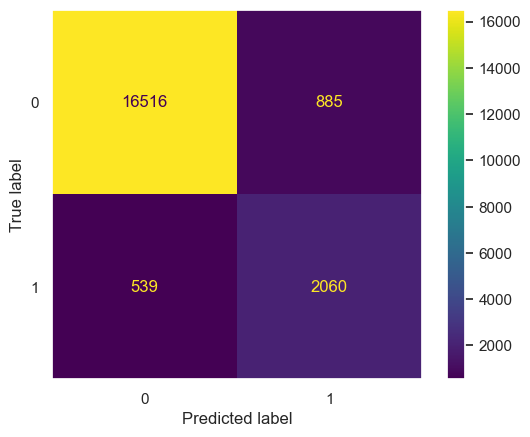

In [65]:
show_confusion_matrix(dt)

**Observation** : Decision Tree significantly improves the classification performance. However, high difference between training and validation Precision, Recall and F1-score can indicate overfitting of model on training data. Let us see if Random Forest ensemble can improve this.

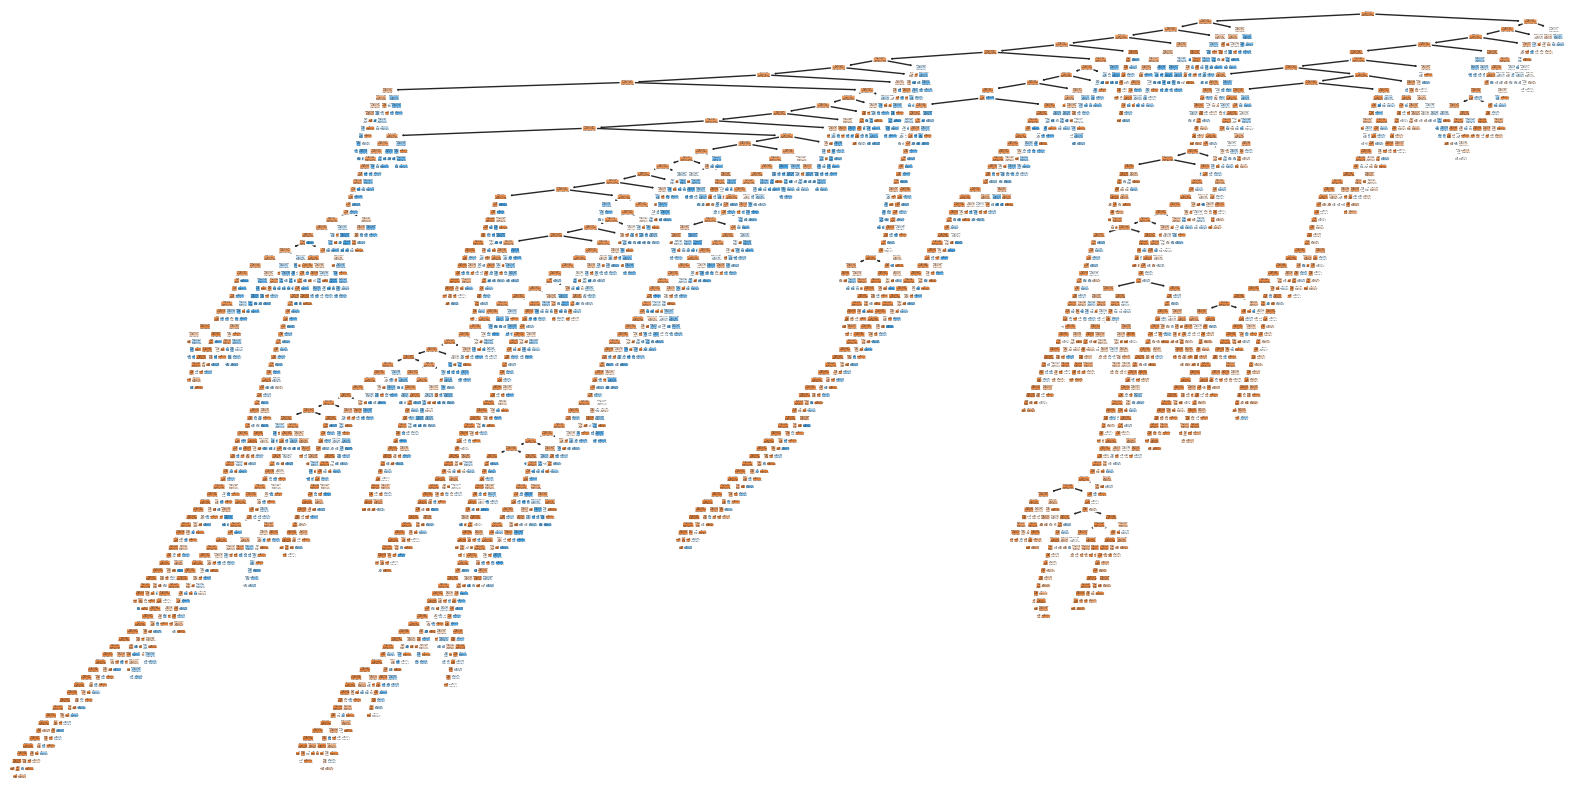

In [84]:
dt_tree = dt
plt.figure(figsize=(20, 10))
plot_tree(dt_tree, filled=True, rounded=True)
plt.show()

In [85]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [66]:
with open('dt.pkl', 'wb') as f:
    pickle.dump(dt, f)

___

# Random Forest

In [67]:
%%time
rf = RandomForestClassifier(n_jobs=-1,random_state=42)
rf.fit(X_train,y_train)

CPU times: total: 1min 44s
Wall time: 15.2 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [68]:
scores = -1*cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_log_loss')
print("Cross-Validation Scores:", scores)
print("Mean Score (neg_log_loss):", scores.mean())
print("Standard Deviation of Scores:", scores.std())

Cross-Validation Scores: [0.23738725 0.21909822 0.27635219 0.28988317 0.25382904]
Mean Score (neg_log_loss): 0.25530997426757274
Standard Deviation of Scores: 0.025584328079726902


In [69]:
show_val_scores(rf)

{'Training Accuracy': 0.9431666666666667,
 'Validation Accuracy': 0.93075,
 'Training Precision': 0.7340300735843021,
 'Validation Precision': 0.6944266495836002,
 'Training Recall': 0.8825490447493268,
 'Validation Recall': 0.8341669873028088,
 'Training F1 Score': 0.8014671634839311,
 'Validation F1 Score': 0.7579094563887432,
 'Training ROC-AUC': 0.980404517735023,
 'Validation ROC-AUC': 0.9693410746517666,
 'Training Log-Loss': 2.048480967614825,
 'Validation Log-Loss': 2.496022997196363}

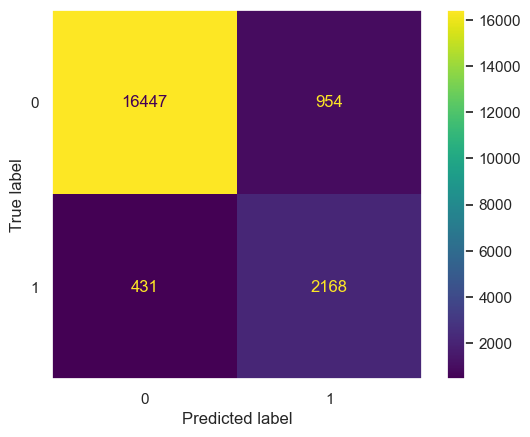

In [70]:
show_confusion_matrix(rf)

**Observation** : Comparing with Decision Tree metrics, Accuracy and Precision has not improved significantly. However, recall score is improved. Recall measures the proportion of actual positives that are correctly identified, which has improved from 2060 to 2168 (5.2% increase). Due to improvement in recall, F1-score is also improved. Thus, Random forest model shows a noticeable improvement.

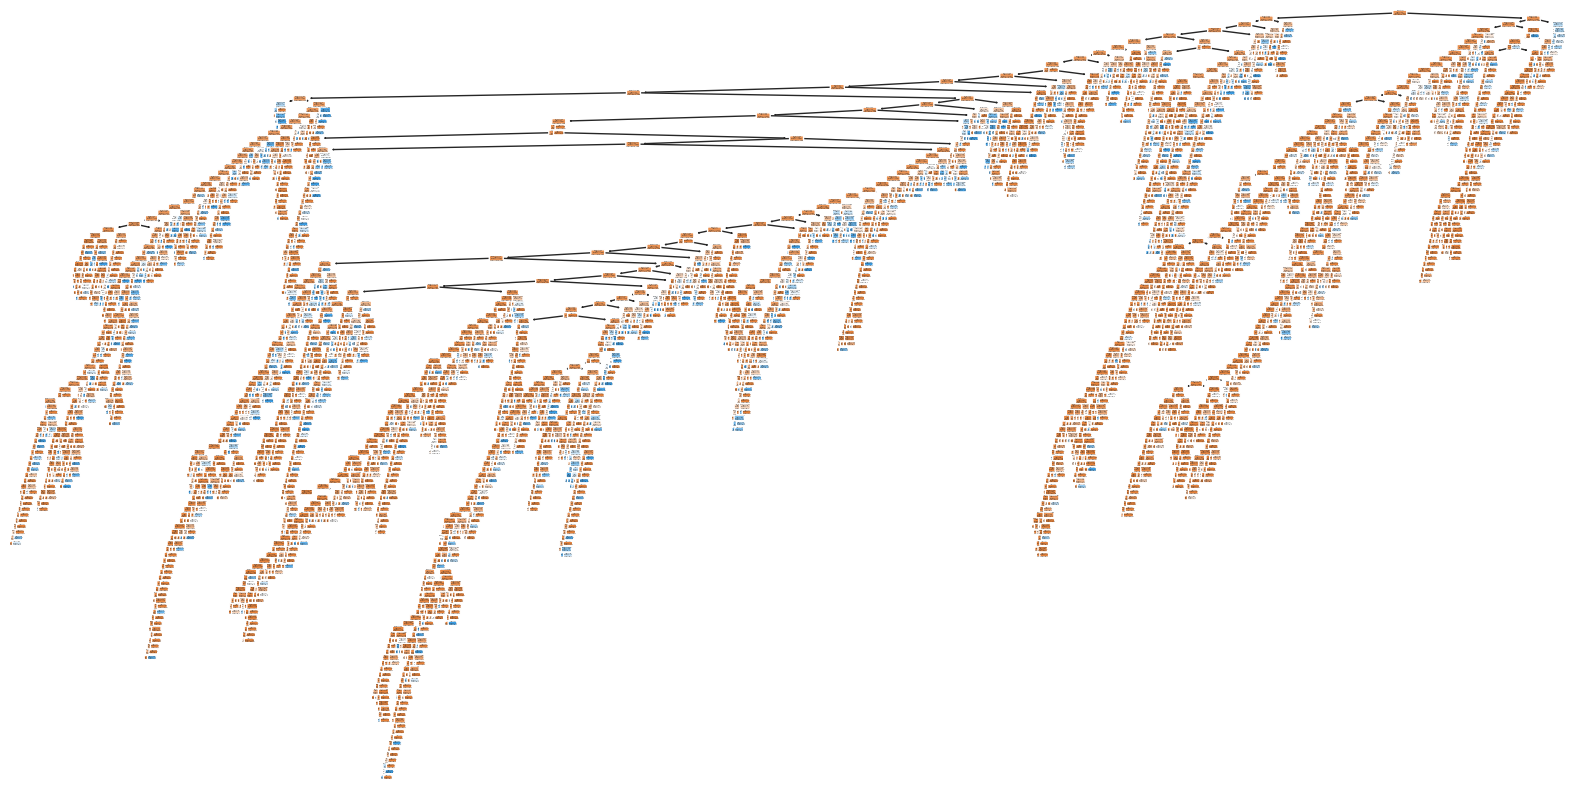

In [82]:
single_tree = rf.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(single_tree, filled=True, rounded=True)
plt.show()

In [86]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [71]:
with open('rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

___

# Random Forest with RandomizedSearchCV

In [72]:
%%time
rf_rs = RandomForestClassifier(n_jobs=-1,random_state=42)

scoring = {
    'accuracy':'accuracy',
    'precision':'precision',
    'recall':'recall',
    'f1_macro':'f1_macro',
    'roc_auc':'roc_auc',
    'neg_log_loss':'neg_log_loss'
}

param_grid_rs = {
    'n_estimators': randint(100,1000),
    'max_depth': randint(5,50), 
    'min_samples_split': randint(2,20),
    'min_samples_leaf': randint(1,10),
    'max_samples': uniform(0.5,0.5),
    'max_features':uniform(0.1,0.9)
}

rf_cv = RandomizedSearchCV(rf_rs,
                           param_grid_rs,
                           n_iter=10,
                           cv=2,
                           scoring=scoring,
                           refit='neg_log_loss',
                           random_state=42,
                           verbose=True)

rf_cv.fit(X_train,y_train)
cv_results(rf_cv)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters:

{'max_depth': 42, 'max_features': 0.1007008892569129, 'max_samples': 0.9961057796456088, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 413}


Rank 1 : {'max_depth': 42, 'max_features': 0.1007008892569129, 'max_samples': 0.9961057796456088, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 413}
Rank 2 : {'max_depth': 46, 'max_features': 0.6109302950379923, 'max_samples': 0.5156566462277793, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 261}
Rank 3 : {'max_depth': 43, 'max_features': 0.8168886881742096, 'max_samples': 0.5917173949330818, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 221}
Rank 4 : {'max_depth': 32, 'max_features': 0.4961372443656412, 'max_samples': 0.5610191174223894, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 134}
Rank 5 : {'max_depth': 28, 'max_features': 0.6857996256539676, 'max_samples': 0.52820578951355

,params,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_macro,mean_test_roc_auc,mean_test_neg_log_loss,rank_test_neg_log_loss
0,"{'max_depth': 43, 'max_features': 0.8168886881...",0.879867,0.754751,0.113093,0.565704,0.935811,0.253738,3
1,"{'max_depth': 23, 'max_features': 0.1899774242...",0.872550,0.750917,0.029235,0.493961,0.885753,0.312497,6
2,"{'max_depth': 28, 'max_features': 0.6857996256...",0.873833,0.790328,0.040134,0.504296,0.911297,0.290269,5
3,"{'max_depth': 42, 'max_features': 0.1007008892...",0.887417,0.734688,0.210158,0.632280,0.945292,0.238034,1
4,"{'max_depth': 26, 'max_features': 0.1063596746...",0.871017,0.806216,0.010129,0.475486,0.889201,0.314478,7
5,"{'max_depth': 7, 'max_features': 0.87394636606...",0.869950,0.208333,0.001282,0.466495,0.685341,0.368849,10
6,"{'max_depth': 8, 'max_features': 0.94798158011...",0.870183,0.782051,0.003462,0.468710,0.705886,0.365186,9
7,"{'max_depth': 32, 'max_features': 0.4961372443...",0.874300,0.777238,0.046930,0.510413,0.918415,0.280935,4
8,"{'max_depth': 18, 'max_features': 0.4519545468...",0.872567,0.742621,0.030004,0.494667,0.859502,0.325006,8
9,"{'max_depth': 46, 'max_features': 0.6109302950...",0.884650,0.745629,0.171177,0.607794,0.934508,0.247823,2


In [73]:
show_val_scores(rf_cv)

{'Training Accuracy': 0.9086333333333333,
 'Validation Accuracy': 0.89515,
 'Training Precision': 0.8275374611252474,
 'Validation Precision': 0.7359022556390977,
 'Training Recall': 0.37530452622131044,
 'Validation Recall': 0.30126971912273953,
 'Training F1 Score': 0.5164079040225829,
 'Validation F1 Score': 0.4275184275184275,
 'Training ROC-AUC': 0.9763300067016101,
 'Validation ROC-AUC': 0.9651864992346414,
 'Training Log-Loss': 3.293188464652338,
 'Validation Log-Loss': 3.7791770578489334}

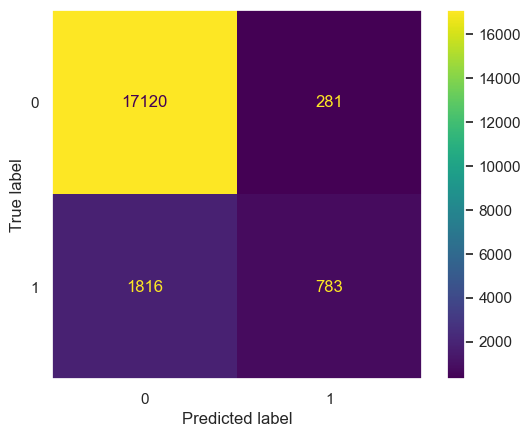

In [74]:
show_confusion_matrix(rf_cv)

**Observation** : The RandomizedSearchCV was expected to produce better result due to cross-validation. But due to the non-exhaustive nature of RandomizedSearchCV, it may or may not always find optimal solution, leading to poor performance. Also, even just a 2-Fold CV on 10 randomly selected Hyperparameter combinations took more than 1 hour to fit, making this process computationally very expensive.

In [78]:
rf_cv.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 42,
 'max_features': 0.1007008892569129,
 'max_leaf_nodes': None,
 'max_samples': 0.9961057796456088,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 13,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 413,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [75]:
with open('rf_rscv.pkl', 'wb') as f:
     pickle.dump(rf_cv.best_estimator_, f)

# **Conclusion**

Amongst the 4 classifiers, the performance of **Random Forest** seems to be the most promising. Let us verify this performance again using previously unseen test data.

In [90]:
X_test = pipe.transform(X_test)

show_test_scores(rf)

{'Training Accuracy': 0.9431666666666667,
 'Testing Accuracy': 0.9284,
 'Training Precision': 0.7340300735843021,
 'Testing Precision': 0.6902510596674275,
 'Training Recall': 0.8825490447493268,
 'Testing Recall': 0.8145440554059253,
 'Training F1 Score': 0.8014671634839311,
 'Testing F1 Score': 0.7472643840451819,
 'Training ROC-AUC': 0.980404517735023,
 'Testing ROC-AUC': 0.9685723218155435,
 'Training Log-Loss': 2.048480967614825,
 'Testing Log-Loss': 2.580725582660788}

As I expected, the classifier is performing comfortably well on the test data. It is not too robust, since Precision and Recall scores discrepancies can mean that the model might be slightly optimistic in its predictions on the training data compared to the validation and test data.

In the context of the given problem, as a bank, we want to avoid lending to high-risk applicants. That means we don't want our model to predict an actual 'high-risk (1)' applicant as a 'low-risk (0)'. This is a False Negative case, which means our goal is to **reduce False Negatives as much as possible, while increasing True Positives and True Negatives as much as possible.**

On the other hand, predicting an actual 'low-risk (0)' applicant as 'high-risk (1)' (False Positive case) would result to unnecessary rejections of applications, which is also not desirable, yet can be considered a secondary objective of the model relative to preventing False Negatives.

The recall is given as : $Recall = \frac{True Positives}{True Positives + False Negatives}$

The precision is given as : $Precision = \frac{True Positives}{True Positives + False Positives}$

The accuracy is given as : $Accuracy = \frac{True Positives + True Negatives}{True Positives + True Negatives + False Positives + False Negatives}$

Thus, the goal of our model is to **increase Accuracy AND Recall** as much as possible, and **increase Precision** if possible. 

Looking at our scores, Random Forest Classifier appears to accomplish these goals reasonably well. Further scope of improvement is still present, such as performing an exhaustive Hyperparameter Tuning using GridSearchCV. From my experience so far, my computer's computational limitations prevent me to perform a wide-range Grid Search.